In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Generate ideal density matrices

In [10]:
def density_matrix(angle):
    rho = np.zeros((16,16))*(1j)
    rho[0,0]=rho[15,0]=rho[0,15]=rho[15,15]= .25
    rho[5,5]=rho[5,10]=rho[10,5]=rho[10,10]= .25
    rho[0,5]=rho[0,10]=rho[15,5]=rho[15,10]= np.exp(-1j*angle*np.pi/180)/4
    rho[5,0]=rho[10,0]=rho[5,15]=rho[10,15]= np.exp(1j*angle*np.pi/180)/4
    return rho

R_0L = np.zeros((16, 16))
R_0L[0,0] = .5
R_0L[0,15] = .5
R_0L[15,0] = .5
R_0L[15,15] = .5

R_1L = np.zeros((16, 16))
R_1L[5,5] = .5
R_1L[5,10] = .5
R_1L[10,5] = .5
R_1L[10,10] = .5

# Load experimental data

In [11]:
rho_0_phys = np.load('rho_0_phys.npy')
rho_1_phys = np.load('rho_1_phys.npy')
rho_p_phys = np.load('rho_p_phys.npy')
rho_m_phys = np.load('rho_m_phys.npy')

# Generate figure

Text(0, -4, '(d)')

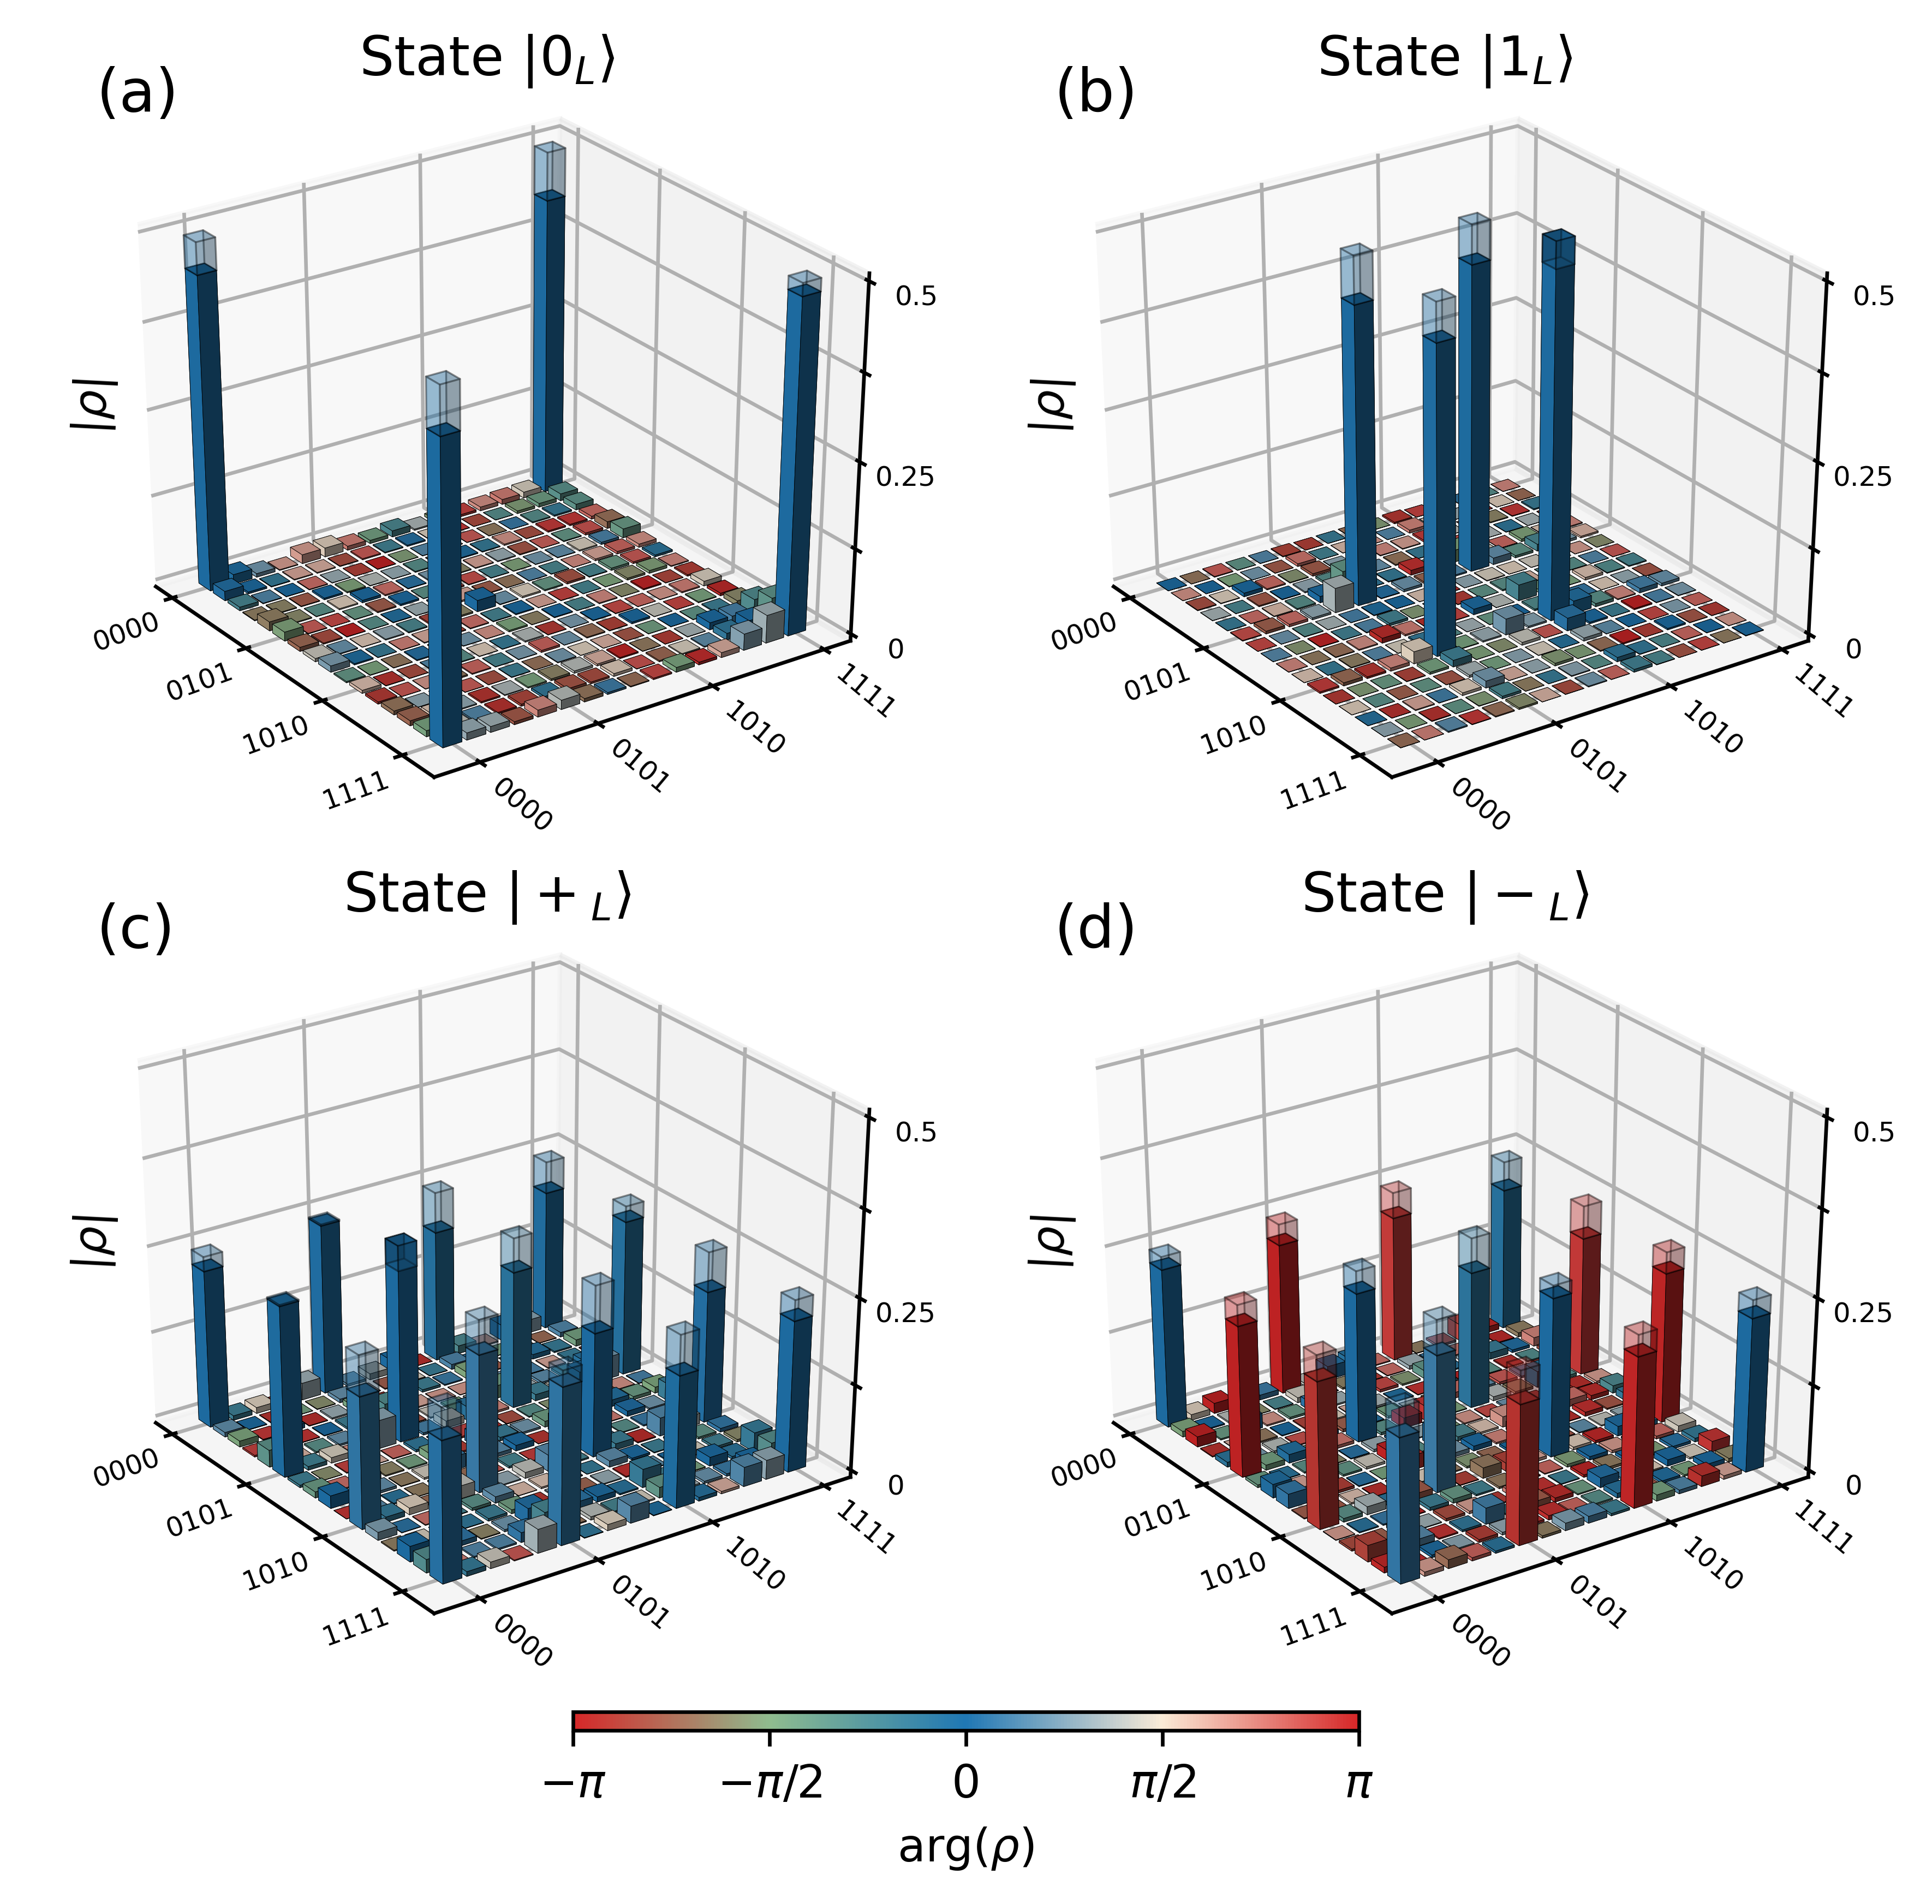

In [16]:
plt.rcdefaults()
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"
fig = plt.figure(figsize=(6, 5.7), dpi = 600)

ax1 = fig.add_subplot(221, projection='3d', azim=-35, elev=30)
ax2 = fig.add_subplot(222, projection='3d', azim=-35, elev=30)
ax3 = fig.add_subplot(223, projection='3d', azim=-35, elev=30)
ax4 = fig.add_subplot(224, projection='3d', azim=-35, elev=30)
for rho, ax, rho_id in zip([rho_0_phys, rho_1_phys, rho_p_phys, rho_m_phys],[ax1, ax2, ax3, ax4], 
                           [R_0L, R_1L, density_matrix(0), density_matrix(180)]):

    xedges = np.arange(-.75, 16, 1)
    yedges = np.arange(-.75, 16, 1)
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = .8
    dz = np.abs(rho).ravel()
    
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C3",'darkseagreen',"C0",'antiquewhite',"C3"])
    norm = matplotlib.colors.Normalize(vmin=-np.pi, vmax=np.pi)
    color=cmap(norm([np.angle(e) for e in rho.ravel()]))
    dz1 = np.abs(rho_id).ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='max',
             color=color, alpha=1 , edgecolor='black', linewidth=.1)
    # selector
    s = [k for k in range(len(dz1)) if dz1[k] > .15]
    ax.bar3d(xpos[s], ypos[s], dz[s], dx, dy, dz=dz1[s]-dz[s], zsort='min',
             color=color[s], alpha=.25, edgecolor='black', linewidth=.4)
    
    ax.set_xticks([ -.5, 4.5,   9.5, 14.5])
    ax.set_yticks([0.25, 5.25,10.25,15.25])
    ax.set_xticklabels(['0000', '0101', '1010', '1111'], rotation=20, fontsize=6, ha='right')
    ax.set_yticklabels(['0000', '0101', '1010', '1111'], rotation=-40, fontsize=6)
    ax.tick_params(axis='x', which='major', pad=-6)
    ax.tick_params(axis='y', which='major', pad=-6)
    ax.tick_params(axis='z', which='major', pad=-2)
    for tick in ax.yaxis.get_majorticklabels():
        tick.set_horizontalalignment("left")
    ax.set_zticks(np.linspace(0, 1, 9))
    ax.set_zticklabels(['0', '', '0.25', '', '0.5', '', '0.75', '', '1'], fontsize=6)
    ax.set_zlim(0, .5)
    ax.set_zlabel(r'$|\rho|$', labelpad=-123)

ax1.set_title(r'State $|0_L\rangle$', pad=12.5, fontsize=12)
ax2.set_title(r'State $|1_L\rangle$', pad=12.5, fontsize=12)
ax3.set_title(r'State $|+_L\rangle$', pad=12.5, fontsize=12)
ax4.set_title(r'State $|-_L\rangle$', pad=12.5, fontsize=12)

fig.tight_layout()

# colorbar
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.3, 0.06, 0.4, 0.01])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cb = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cb.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cb.set_ticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
cb.set_label(r'arg$(\rho)$', fontsize=10)
cb.ax.tick_params(labelsize=10)

ax1.text(0,-4,.7, '(a)', fontsize=13)
ax2.text(0,-4,.7, '(b)', fontsize=13)
ax3.text(0,-4,.7, '(c)', fontsize=13)
ax4.text(0,-4,.7, '(d)', fontsize=13)